# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about creating a consistent 'Tidy' data structure. This data structure has its variables as columns, observations as rows, and types of observations as tables. This paper claims and demonstrates that using such a data structure has advantages for data analysis.
2. The 'tiny data standard' intends to swiften the cleaning of data and make the creation of data analysis tools simpler because of the standardized input format.
3. The first sentence is a metaphor for tidy datasets. Tidy datasets all have the same beneficial features, so they are a 'happy family'. However, for a messy dataset, the 'unhappy family', there could be many different things that need to be addressed in order to transform it into a tidy dataset. The second sentence describes that given just a name or description, it can be hard to determine if something is a variable without a table. Depending on what the data is describing, a variable in one scenario could be an observation of a larger overarching variable in anther scenario.
4. A value is a quantitative or qualitative measurement. A variable is a category where a set of values share the same attribute. An observation is when a set of values accross variables is measured under the same unit.
5. Tiny data is when a dataset has its variables as columns, observations as rows, and observation types as tables.
6. 1. Columns represent values 2. Multiple variables are in one column 3. Variables are stored in both rows and columns 4. Multiple observational units are within the same table 5. A single observational unit is split between multiple tables.

  Table 4 isn't tidy because its column headers are values belonging to a variable which could be called 'income'. Melting is turning columns into rows when the headers are values.
7. Table 11 is messy as it has observations (days) as column headers. In table 12a, the table is molten as the observations are now in rows; however, it's still not tidy as there are variables (in the element column) as rows. Table 12b is tidy as it meets all the requirements of tidy data.
8. To create a tidy framework, it's only useful with tidy tools; therefore, a 'chicken-and-egg' problem emerges as you cannot independently change one without changing the other and it becomes unclear when and where to start. Wickham hopes that people build upon his start of tidy data to develop better strategies for data wrangling.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [68]:
import numpy as np
import pandas as pd

# Load data
q1 = pd.read_csv('./data/airbnb_hw.csv', low_memory = False)
q1.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [69]:
# Look at any value in Price > 999
q1[q1['Price'].str.contains(',')].head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
101,8730,2/27/2009,Comfort & Convenience,Manhattan,Condominium,100.0,Entire home/apt,10003.0,6.0,1,4,"1,990",100.0
263,34915,8/30/2009,Luxurious 2-Floor Manhattan Mansion,Manhattan,Apartment,NaN,Entire home/apt,10075.0,2.0,1,0,"1,000",NaN
764,112879,4/23/2010,Modern Luxury Meets Old Money Charm,Brooklyn,Apartment,NaN,Entire home/apt,11206.0,5.0,1,0,"1,200",NaN
1272,214148,8/26/2010,"LARGE, COMFY 1BDR W/CHARACTER!!!",Brooklyn,Apartment,90.0,Entire home/apt,11216.0,1.0,1,30,"1,000",92.0
1275,213266,8/26/2010,Beautiful 1 Bedroom in Nolita/Soho,Manhattan,Apartment,75.0,Entire home/apt,10012.0,2.0,1,2,"5,000",76.0


In [70]:
# Remove , from strings, then convert column to integers
q1['Price'] = q1['Price'].str.replace(',','')
q1['Price'] = q1['Price'].astype(int)
q1[q1['Price']>999].head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
101,8730,2/27/2009,Comfort & Convenience,Manhattan,Condominium,100.0,Entire home/apt,10003.0,6.0,1,4,1990,100.0
263,34915,8/30/2009,Luxurious 2-Floor Manhattan Mansion,Manhattan,Apartment,NaN,Entire home/apt,10075.0,2.0,1,0,1000,NaN
764,112879,4/23/2010,Modern Luxury Meets Old Money Charm,Brooklyn,Apartment,NaN,Entire home/apt,11206.0,5.0,1,0,1200,NaN
1272,214148,8/26/2010,"LARGE, COMFY 1BDR W/CHARACTER!!!",Brooklyn,Apartment,90.0,Entire home/apt,11216.0,1.0,1,30,1000,92.0
1275,213266,8/26/2010,Beautiful 1 Bedroom in Nolita/Soho,Manhattan,Apartment,75.0,Entire home/apt,10012.0,2.0,1,2,5000,76.0


In [71]:
# Check updated type
print("New type of Price: " + str(type(q1['Price'][0])))

New type of Price: <class 'numpy.int64'>


1. For the airbnb data, I believe that the prices would be better stored as integers; therefore, I removed the ',' from any number greater than 999 and converted the resulting strings into ints.

In [72]:
# Load data
q2 = pd.read_csv('./data/sharks.csv', low_memory = False)
q2.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Check for nan values and unique values in Type
print("Number of NaN values in Type:" + str(q2['Type'].isna().sum()))
q2['Type'].unique()

Number of NaN values in Type:5


array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [74]:
# Convert nan values to Unconfirmed
q2['Type'] = q2['Type'].fillna('Unconfirmed')
print("New number of NaN values in Type:" + str(q2['Type'].isna().sum()))

New number of NaN values in Type:0


In [75]:
# Transform similar watercraft values into one unified value
q2['Type'] = q2['Type'].replace(['Watercraft', 'Boating', 'Boat', 'Boatomg'], 'Watercraft')
q2['Type'] = q2['Type'].replace(['Unconfirmed', 'Unverified', 'Invalid'], 'Unconfirmed')

In [76]:
# Leftover values
q2['Type'].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Under investigation', 'Sea Disaster'], dtype=object)

In [77]:
q2.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. For the shark data, the 'Type' column had 5 'nan' values. Looking at the unique values within this variable, I saw that there was an 'unconfirmed' value. Since 'unconfirmed' indicates the same thing as 'nan' where the value is unknown, I set all 'nan' values to 'unconfirmed' to avoid deleting those rows. I saw that the 'unverified' and 'invalid' values were also similar to 'unconfirmed', so I changed those to 'unconfirmed' also. I again combined similar variables 'Boating', 'Boat', and 'Boatomg' into one 'watercraft' variable.

In [78]:
# Load data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
q3 = pd.read_csv(url,low_memory=False)
q3.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [79]:
print("Number of NaN values in WhetherDefendantWasReleasedPretrial:" + str(q3['WhetherDefendantWasReleasedPretrial'].isna().sum()))
q3['WhetherDefendantWasReleasedPretrial'].unique()

Number of NaN values in WhetherDefendantWasReleasedPretrial:0


array([9, 0, 1])

In [80]:
q3['WhetherDefendantWasReleasedPretrial'] = q3['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)

Since 9 represent 'unconfirmed', I replaced 9 with np.nan.

In [81]:
print("Object type for SentenceTypeAllChargesAtConvictionInContactEvent")
print(type(q3['SentenceTypeAllChargesAtConvictionInContactEvent'][0]))
print("Object type for ImposedSentenceAllChargeInContactEvent")
print(type(q3['ImposedSentenceAllChargeInContactEvent'][0]))

Object type for SentenceTypeAllChargesAtConvictionInContactEvent
<class 'numpy.int64'>
Object type for ImposedSentenceAllChargeInContactEvent
<class 'str'>


In [82]:
# Replace ' ' with np.nan
q3['ImposedSentenceAllChargeInContactEvent'] = q3['ImposedSentenceAllChargeInContactEvent'].replace(' ', np.nan)
# Convert strings to float
q3['ImposedSentenceAllChargeInContactEvent'] = q3['ImposedSentenceAllChargeInContactEvent'].astype(float)

In [83]:
q3.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


I first changed all ' ' to np.nan since these are missing values. Then, since the variables are decimals, I converted the object type from a string to a float.

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [84]:
# Parts 1 and 2
# Load data
college = pd.read_csv('./data/college_completion.csv', low_memory=False)
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [85]:
college.shape

(3798, 63)

As seen above, the dataset has 63 columns and 3798 rows. This means that the dataset has 3798 observations.

In [86]:
list(college)

['index',
 'unitid',
 'chronname',
 'city',
 'state',
 'level',
 'control',
 'basic',
 'hbcu',
 'flagship',
 'long_x',
 'lat_y',
 'site',
 'student_count',
 'awards_per_value',
 'awards_per_state_value',
 'awards_per_natl_value',
 'exp_award_value',
 'exp_award_state_value',
 'exp_award_natl_value',
 'exp_award_percentile',
 'ft_pct',
 'fte_value',
 'fte_percentile',
 'med_sat_value',
 'med_sat_percentile',
 'aid_value',
 'aid_percentile',
 'endow_value',
 'endow_percentile',
 'grad_100_value',
 'grad_100_percentile',
 'grad_150_value',
 'grad_150_percentile',
 'pell_value',
 'pell_percentile',
 'retain_value',
 'retain_percentile',
 'ft_fac_value',
 'ft_fac_percentile',
 'vsa_year',
 'vsa_grad_after4_first',
 'vsa_grad_elsewhere_after4_first',
 'vsa_enroll_after4_first',
 'vsa_enroll_elsewhere_after4_first',
 'vsa_grad_after6_first',
 'vsa_grad_elsewhere_after6_first',
 'vsa_enroll_after6_first',
 'vsa_enroll_elsewhere_after6_first',
 'vsa_grad_after4_transfer',
 'vsa_grad_elsewhere_a

Above are the variables of the dataset.

In [87]:
# Part 3
pd.crosstab(college.control, college.level)

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Public schools had the most number of schools overall and had the most 2-year programs. Private not-for-profits had the most 4-year programs. Private for-profit had the least number of schools overall.

array([[<Axes: title={'center': 'grad_100_value'}>]], dtype=object)

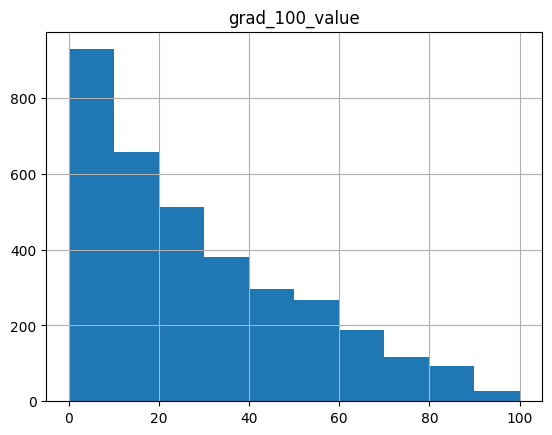

In [88]:
# Part 4
college.hist('grad_100_value')

<Axes: ylabel='Density'>

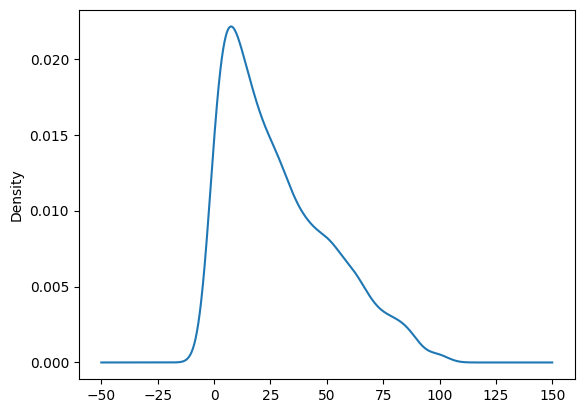

In [89]:
college['grad_100_value'].plot.kde()

<Axes: >

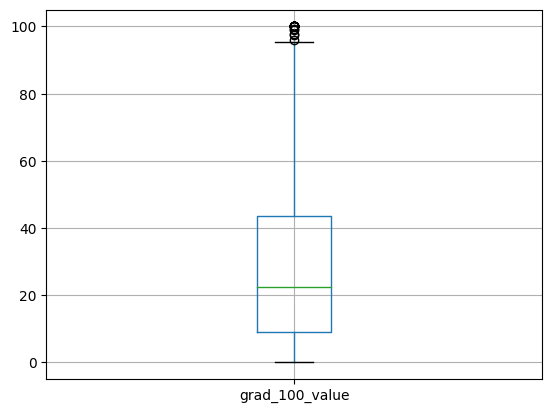

In [90]:
college.boxplot('grad_100_value')

In [91]:
college['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

control                 level 
Private for-profit      2-year    Axes(0.125,0.11;0.775x0.77)
                        4-year    Axes(0.125,0.11;0.775x0.77)
Private not-for-profit  2-year    Axes(0.125,0.11;0.775x0.77)
                        4-year    Axes(0.125,0.11;0.775x0.77)
Public                  2-year    Axes(0.125,0.11;0.775x0.77)
                        4-year    Axes(0.125,0.11;0.775x0.77)
Name: grad_100_value, dtype: object

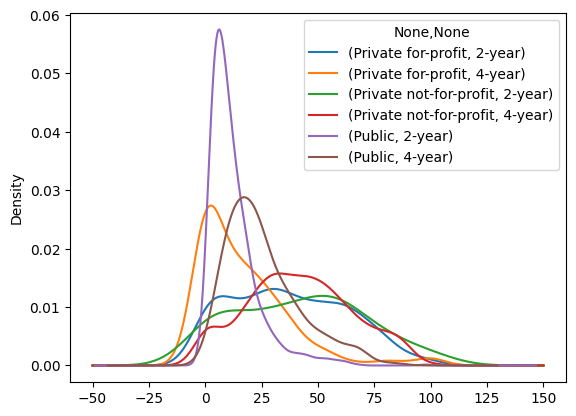

In [92]:
# Part 5
college.groupby(['control', 'level'])['grad_100_value'].plot.kde(legend=True)

In [93]:
college.groupby(['control', 'level'])['grad_100_value'].describe()

count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                       4-year  21.8  33.800   86.3

As seen above, private not-for-profits had the highest mean graduation rate with ~41%. The second highest would be private for-profits 2 year programs at ~37%.

levelXcontrol
2-year, Private for-profit        Axes(0.125,0.11;0.775x0.77)
2-year, Private not-for-profit    Axes(0.125,0.11;0.775x0.77)
2-year, Public                    Axes(0.125,0.11;0.775x0.77)
4-year, Private for-profit        Axes(0.125,0.11;0.775x0.77)
4-year, Private not-for-profit    Axes(0.125,0.11;0.775x0.77)
4-year, Public                    Axes(0.125,0.11;0.775x0.77)
Name: grad_100_value, dtype: object

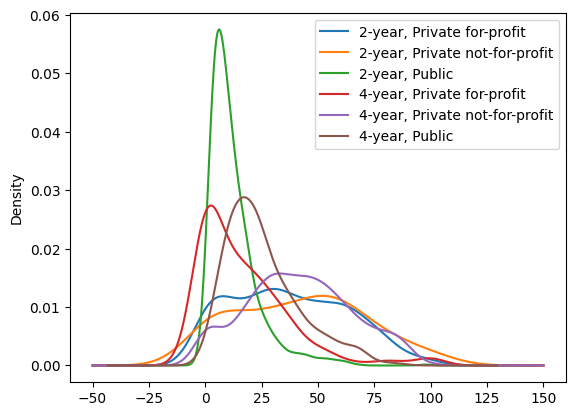

In [94]:
# Part 6
college['levelXcontrol'] = college['level'] + ', ' + college['control']
college.groupby('levelXcontrol')['grad_100_value'].plot.kde(legend = True)

2 year private programs and the 4 year private not-for-profit program seem to have the highest graduation rates as they have the highest density at high rate values.

<Axes: ylabel='Density'>

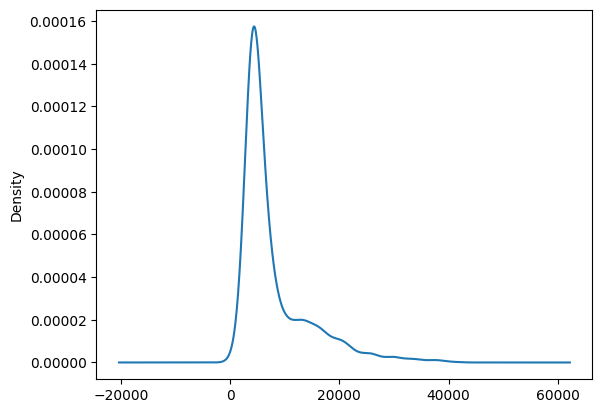

In [95]:
# Part 7
college['aid_value'].plot.kde()

control                 level 
Private for-profit      2-year    Axes(0.125,0.11;0.775x0.77)
                        4-year    Axes(0.125,0.11;0.775x0.77)
Private not-for-profit  2-year    Axes(0.125,0.11;0.775x0.77)
                        4-year    Axes(0.125,0.11;0.775x0.77)
Public                  2-year    Axes(0.125,0.11;0.775x0.77)
                        4-year    Axes(0.125,0.11;0.775x0.77)
Name: aid_value, dtype: object

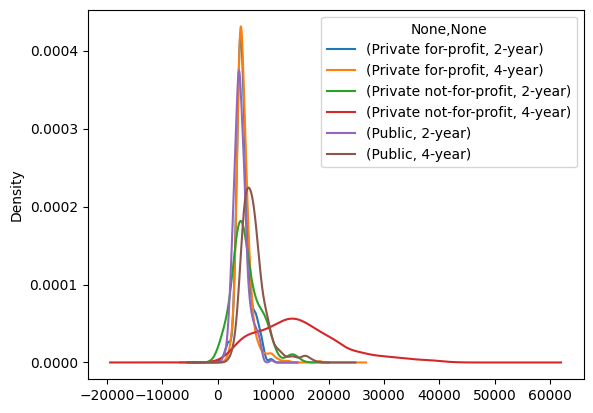

In [96]:
college.groupby(['control', 'level'])['aid_value'].plot.kde(legend=True)

In [97]:
college.groupby(['control', 'level'])['aid_value'].describe()

count          mean          std     min  \
control                level                                               
Private for-profit     2-year   464.0   4559.681034  1286.688269   294.0   
                       4-year   527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1180.0  14702.401695  7649.775203   902.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.5  18996.75  41580.0  
Public                 2-year  3311.25   3943.5   4762.00   9809.0  
                       4-year  4990.50   6085.0   7341.50  17299.0

One peak is around ~5000 because most aid_value means are around here; however, there is another peak near 14000 since the mean aid_value for private not-for-profits is 14702.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

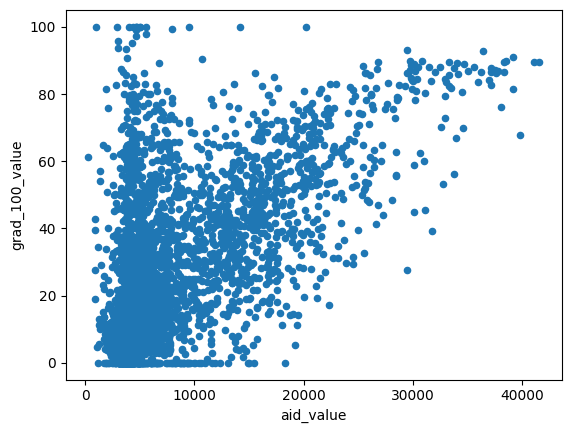

In [98]:
# Part 8
college.plot.scatter('aid_value', 'grad_100_value')

It seems that as aid_value increases grad_100_value also increases.

level   control               
2-year  Private for-profit        Axes(0.125,0.11;0.775x0.77)
        Private not-for-profit    Axes(0.125,0.11;0.775x0.77)
        Public                    Axes(0.125,0.11;0.775x0.77)
4-year  Private for-profit        Axes(0.125,0.11;0.775x0.77)
        Private not-for-profit    Axes(0.125,0.11;0.775x0.77)
        Public                    Axes(0.125,0.11;0.775x0.77)
dtype: object

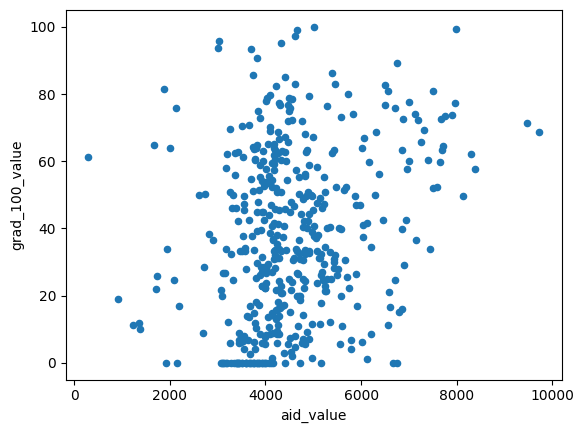

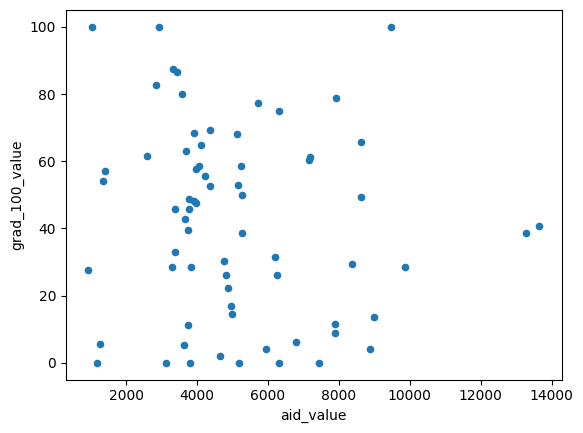

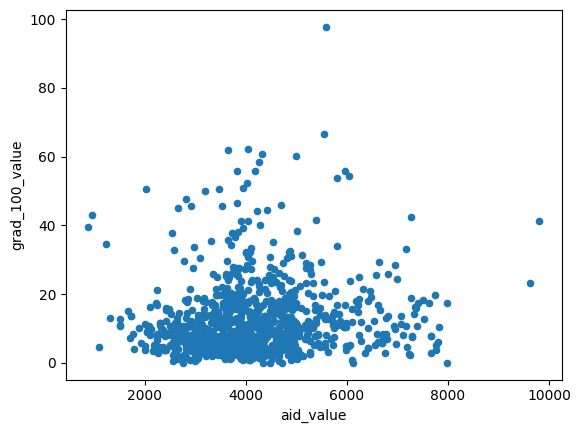

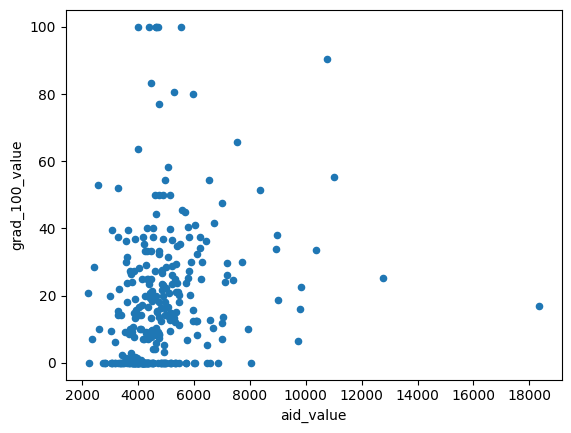

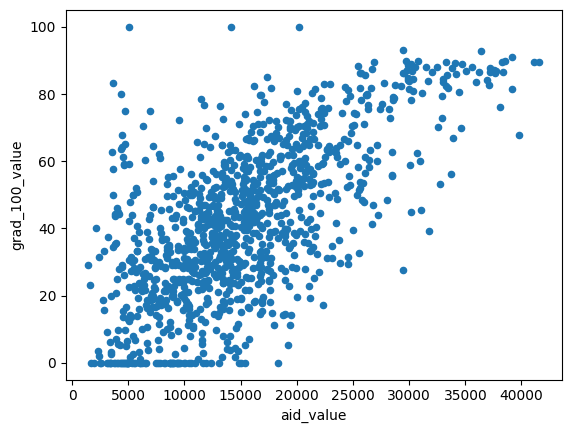

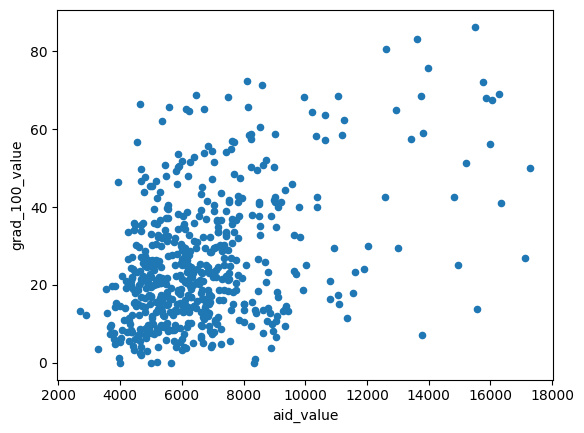

In [99]:
college.groupby(['level','control']).plot.scatter('aid_value', 'grad_100_value')

Aid seems to affect graduation rate for public schools, especially for 2 year programs as these graphs show a positive linear trend.

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.